In [1]:
from keras.layers import Input,Dense,Conv2D,MaxPool2D,UpSampling2D
from keras.models import Model

input_layer=Input(shape=(28,28,1))  #layer 1
#train_data (60000,28,28,1)

model=Conv2D(32,(3,3),activation='relu',padding='same')(input_layer)
model=MaxPool2D((2,2),padding='same')(model)
model=Conv2D(32,(3,3),activation='relu',padding='same')(model)
encoder=MaxPool2D((2,2),padding='same')(model) #output=(7,7) x32 bottle neck

model=Conv2D(32,(3,3),activation='relu',padding='same')(encoder)
model=UpSampling2D((2,2))(model) #inverse of pooling
model=Conv2D(32,(3,3),activation='relu',padding='same')(model)
model=UpSampling2D((2,2))(model) #output=(28,28) x32

decoder=Conv2D(1,(3,3),activation='relu',padding='same')(model) #output=(28,28) x1

autoencoder=Model(input_layer,decoder)

autoencoder.compile(optimizer='adam',loss='mse')

In [2]:
autoencoder.load_weights('autoencorders_noise_removal.h5')

In [3]:
from keras.datasets import mnist

(a,a),(test_data,a)=mnist.load_data()

test_data=test_data/255.0

In [4]:
import numpy as np

test_data=test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],1)
test_data_noisy=test_data+0.5*np.random.normal(loc=0,scale=1,size=test_data.shape)
test_data_noisy=np.clip(test_data_noisy,0,1)
print(test_data_noisy.shape)

(10000, 28, 28, 1)


In [5]:
results=autoencoder.predict(test_data_noisy)
print(results.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
(10000, 28, 28, 1)


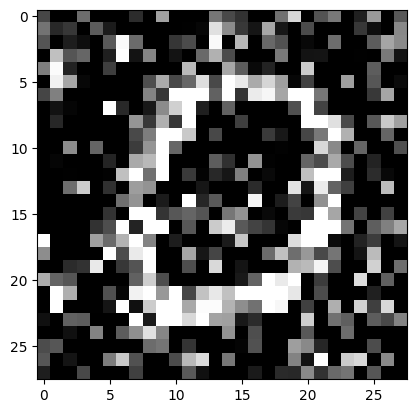

In [6]:
from matplotlib import pyplot as plt

plt.imshow(test_data_noisy[10],cmap='gray')

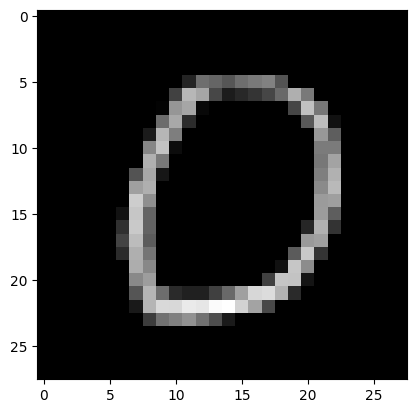

In [7]:
plt.imshow(results[10],cmap='gray')

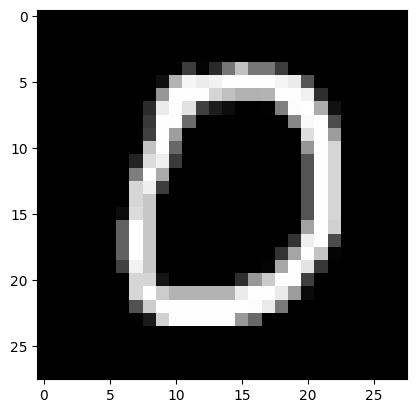

In [8]:
plt.imshow(test_data[10],cmap='gray')

(28, 56, 1)


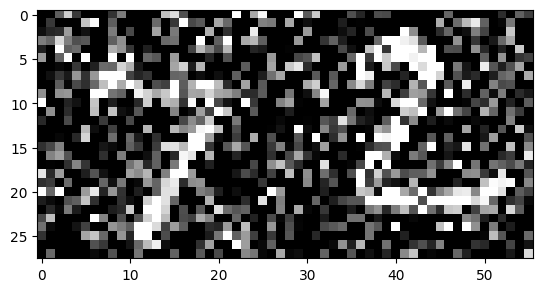

In [9]:
test_image=np.concatenate((test_data_noisy[0],test_data_noisy[1]),axis=1)
print(test_image.shape)
plt.imshow(test_image,cmap='gray')